<a href="https://colab.research.google.com/github/caiociardelli/sphglltools/blob/main/doc/L3_Gauss_Lobatto_Legendre_quadrature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gauss-Lobatto-Legendre quadrature

Author: Caio Ciardelli
<br>
<br>
If you use this Jupyter, please, cite the following paper:
<br>
<br>
Ciardelli, C., Bozdağ, E., Peter, D., and van der Lee, S., 2021. SphGLLTools: A toolbox for visualization of large seismic model files based on 3D spectral-element meshes. Computer & Geosciences, submitted.
<br>
<br>

The Gauss-Lobatto-Legendre (GLL) quadrature uses a set of weights and the function values at a number of nodes to approximate its integral over the standard interval $[-1, 1]$ by a summation:
<br>
<br>
\begin{equation}
  \int_{-1}^{1} f\,(\xi)\,d\xi
  \,\approx\,\sum_{i =\, 0}^n w_i\,f\,({\xi}_i)
\end{equation}
<br>
<br>
The GLL quadrature is based on the *Legendre polynomials.*
<br>
<br>

####Lengendre polynomials

Rodrigues formula:
<br>
<br>
\begin{equation}
  P_n\,(\xi)
  \,=\,\frac{1}{2^n n!}\,\left(\frac{d}{dx}\right)^n\left({\xi}^2\,-\,1\right)^n
\end{equation}
<br>
<br>
The *Legendre polynomials* can also be calculated via recursion (Bonnet formula) such as:
<br>
<br>
\begin{split}
    P_0\,(\xi)
    \,&=\,1\\
    P_1\,(\xi)
    \,&=\,\xi\\
    P_n\,(\xi)
    \,&=\,\frac{(2n\,-\,1)\,\xi\, P_{n\,-\,1}\,(\xi)\,-\,(n\,-\,1)\,P_{n\,-\,2}\,(\xi)}{n}\qquad n \geq 2
\end{split}
<br>
<br>

In [ ]:
def lgP (n, xi):
  """
  Evaluates P_{n}(xi) using an iterative algorithm
  """
  if n == 0:
    
    return np.ones (xi.size)
  
  elif n == 1:
    
    return xi

  else:

    fP = np.ones (xi.size); sP = xi.copy (); nP = np.empty (xi.size)

    for i in range (2, n + 1):

      nP = ((2 * i - 1) * xi * sP - (i - 1) * fP) / i

      fP = sP; sP = nP

    return nP

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set the parameters below

# N: number of points
# nmax: maximum degree

if __name__ == "__main__":

  N = 1000
  
  nmax = 6

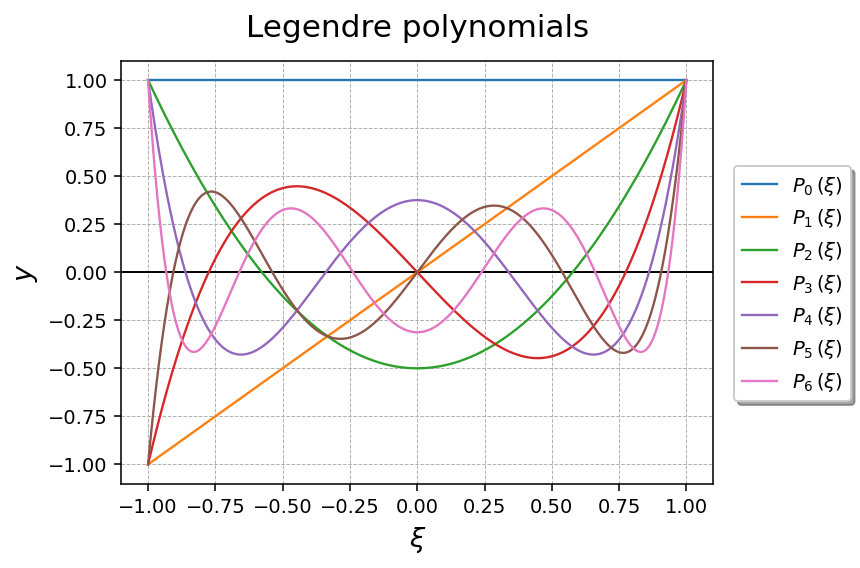

In [ ]:
if __name__ == "__main__":

  xi = np.linspace (-1, 1, N)

  fig = plt.figure (figsize = (6, 4), dpi = 140)

  for n in range (nmax + 1):

    plt.plot (xi, lgP (n, xi),
              label = r'$P_{{{}}}\,(\xi)$'.format (n),
              linewidth = 1.2, zorder = 3)
  
  plt.axhline (0, color = 'black', linewidth = 1, zorder = 2)
  plt.xlabel (r'$\xi$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.grid (linestyle = 'dashed', linewidth = 0.5)
  plt.title ('Legendre polynomials', fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

####Legendre polynomials derivatives

Recursive version for the first three derivatives in the interval $]-1,\,1[$
<br>
<br>
\begin{equation}
  \begin{split}
    & P_n'\,(\xi)
    = \frac{n\,[P_{n\,-\,1}\,(\xi)\,-\,\xi\, P_n\,(\xi)]}{1\,-\,{\xi}^2}\\\\
    & P_n''\,(\xi)
    = \frac{2\,\xi\,P_n'\,(\xi)\,-\,n\,(n\,+\,1)\,P_n\,(\xi)}{1\,-\,{\xi}^2}\\\\
    & P_n'''\,(\xi)
    = \frac{4\,\xi\, P_n''\,(\xi)\,-\,[n\,(n\,+\,1)\,-\,2]\, P_n'\,(\xi)}{1\,-\,{\xi}^2}
  \end{split}
\end{equation}
<br>
<br>

In [ ]:
def dLgP (n, xi):
  """
  Evaluates the first derivative of P_{n}(xi)
  """
  return n * (lgP (n - 1, xi) - xi * lgP (n, xi))\
           / (1 - xi ** 2)

def d2LgP (n, xi):
  """
  Evaluates the second derivative of P_{n}(xi)
  """
  return (2 * xi * dLgP (n, xi) - n * (n + 1)\
                                    * lgP (n, xi)) / (1 - xi ** 2)

def d3LgP (n, xi):
  """
  Evaluates the third derivative of P_{n}(xi)
  """
  return (4 * xi * d2LgP (n, xi)\
                 - (n * (n + 1) - 2) * dLgP (n, xi)) / (1 - xi ** 2)

In [ ]:
# Set the parameters below

# n: degree

if __name__ == "__main__":

  n = 3

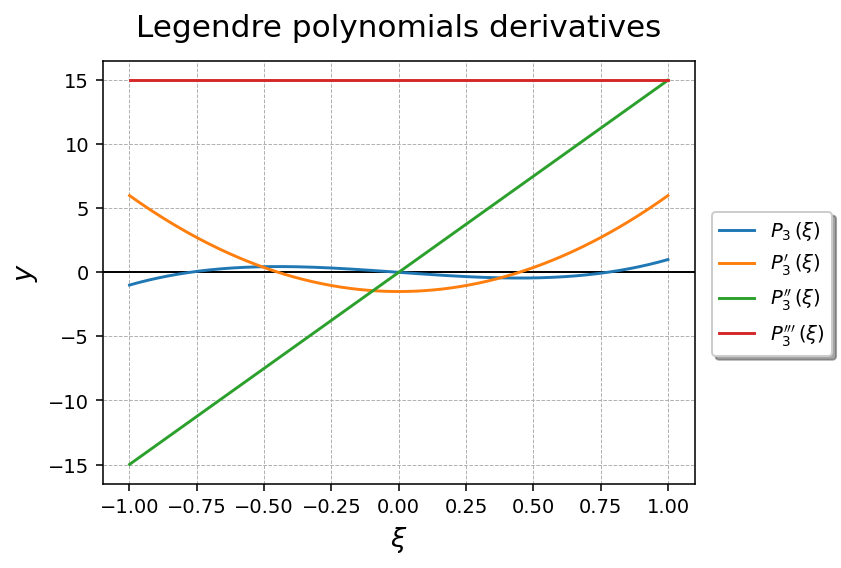

In [ ]:
if __name__ == "__main__":

  xi = np.linspace (-0.999, 0.999, N)

  fig = plt.figure (figsize = (6, 4), dpi = 140)

  plt.plot (xi, lgP (n, xi),
            label = r"$P_{}\,(\xi)$".format (n), zorder = 3)
  plt.plot (xi, dLgP (n, xi),
            label = r"$P_{}'\,(\xi)$".format (n), zorder = 3)
  plt.plot (xi, d2LgP (n, xi),
            label = r"$P_{}''\,(\xi)$".format (n), zorder = 3)
  plt.plot (xi, d3LgP (n, xi),
            label = r"$P_{}'''\,(\xi)$".format (n), zorder = 3)
  
  plt.axhline (0, color = 'black', linewidth = 1, zorder = 2)
  plt.xlabel (r'$\xi$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  fig.legend (loc = 'center right', shadow = True, framealpha = 1.0,
              handlelength = 1.8, fontsize = 10)
  plt.grid (linestyle = 'dashed', linewidth = 0.5)
  plt.title ('Legendre polynomials derivatives',
             fontsize = 16, y = 1.03)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

####GLL weights

For an $n-$point GLL quadrature, the two end-nodes are $-1$ and $1$. The other $n\,-\,2$ nodes are the roots of $P_{n\,-\,1}'\,(\xi)$.
<br>
<br>
The GLL weights are:
<br>
<br>
\begin{equation}
  w_i
  \,=\,
  \begin{cases}
    \dfrac{2}{n\,(n\,+\,1)} & \text{if}\quad {\xi}_i\,=\,\pm1\\\\ 
    \dfrac{2}{n\,(n\,+\,1)\,{P_n\,\left({\xi}_i\right)}^2} & 
    \text{if}\quad x_i \neq \pm1 \end{cases}
\end{equation}
<br>
<br>

####Algorithm

The following algorithm uses Halley's method to calculate the GLL nodes and weights:
<br>
<br>
$\pmb{function}\; gLLNodesAndWeights\, (n,\, x)$ 

$\qquad \pmb{if}\; n\, <\, 2$
    
$\qquad\qquad \pmb{print}\, \text{"Error: n must be larger than 1!"}$
    
$\qquad \pmb{else}$
    
$\qquad\qquad x_1 \gets -1\qquad x_n \gets 1$

$\qquad\qquad w_1 \gets \frac{2}{n\, (n\,-\,1)}
 \;\; w_n \gets w_1$

$\qquad\qquad \pmb{for}\,\, i\, :=\,2 \,\, \pmb{until}\,\, n\,-\,1\,\, \pmb{do}$

$\qquad\qquad\qquad x_i\, :=\, \left[1\,-\, \frac{3\, (n\,-\, 2)}{\;8\, (n\,-\,1)^3} \right] \cos\, \left(\frac{4i\,-\, 3}{4\,(n\,-\,1)\,+\,1} \pi \right)$

$\qquad\qquad\qquad error \gets 1$

$\qquad\qquad\qquad \pmb{while}\,\,  error \,>\, 10^{-15}\, \pmb{do}$

$\qquad\qquad\qquad\qquad y\, \gets\,\, dLgP\, (n-1,\,x_i)$

$\qquad\qquad\qquad\qquad y' \gets d2LgP\, (n-1,\,x_i)$

$\qquad\qquad\qquad\qquad y'' \gets d3LgP\, (n-1,\,x_i)$

$\qquad\qquad\qquad\qquad\! \Delta x \gets 2yy'\, \Big/ \left[2\,{(y')}^2 - yy'' \right]$

$\qquad\qquad\qquad\qquad x_i \gets x_i - \Delta x$

$\qquad\qquad\qquad\qquad error \gets \lvert \Delta x \rvert$

$\qquad\qquad\qquad \pmb{end}$

$\qquad\qquad\qquad w_i \gets 2\, \Big/ \left[n\, (n - 1)\, lgP\, (n-1,\, x_i)^2 \right]$

$\qquad\qquad \pmb{end}$

$\qquad \pmb{return}\; x,\, w$

$\pmb{end}$


####Implementation

In [ ]:
def gLLNodesAndWeights (n, epsilon = 1e-15):
  """
  Computes the GLL nodes and weights
  """
  if n < 2:
    
    print ('Error: n must be larger than 1')
  
  else:
    
    x = np.empty (n)
    w = np.empty (n)
    
    x[0] = -1; x[n - 1] = 1
    w[0] = w[0] = 2.0 / ((n * (n - 1))); w[n - 1] = w[0];
    
    n_2 = n // 2
    
    for i in range (1, n_2):
      
      xi = (1 - (3 * (n - 2)) / (8 * (n - 1) ** 3)) *\
           np.cos ((4 * i + 1) * np.pi / (4 * (n - 1) + 1))
      
      error = 1.0
      
      while error > epsilon:
        
        y  =  dLgP (n - 1, xi)
        y1 = d2LgP (n - 1, xi)
        y2 = d3LgP (n - 1, xi)
        
        dx = 2 * y * y1 / (2 * y1 ** 2 - y * y2)
        
        xi -= dx
        error = abs (dx)
      
      x[i] = -xi
      x[n - i - 1] =  xi
      
      w[i] = 2 / (n * (n - 1) * lgP (n - 1, x[i]) ** 2)
      w[n - i - 1] = w[i]

    if n % 2 != 0:

      x[n_2] = 0;
      w[n_2] = 2.0 / ((n * (n - 1)) * lgP (n - 1, np.array (x[n_2])) ** 2)
      
  return x, w

####Numerical integration

We can apply the GLL integration for functions defined in any interval, provided that we unmap it to the standard one $[-1,\,1]$ and apply the Jacobian.
<br>
<br>
\begin{equation}
  \int_{a}^{b} f\,(x)\,dx
  \,=\,\int_{-1}^{-1} f\,(\mathbf{m}\,(\xi))\,\frac{dx}{d\xi}\,d\xi,
\end{equation}
<br>
<br>
where $\mathbf{m}$: $\mathbb{R}^1\,\to\,\mathbb{R}^1$, with $\xi\,\to\,x$.
<br>
<br>
Let's compute the following integral:
<br>
<br>
\begin{equation}
  \int_{-3}^{\frac{3}{2}} e^{-x^2}\,dx
  \,\approx\,1.742395741884422...
\end{equation}
<br>
<br>
The map from $\xi$ to $x$ is given by:
<br>
<br>
\begin{equation}
  x
  \,=\,\frac{9}{4}\,\xi\,-\,\frac{3}{4}
  \,\implies\,\frac{dx}{d\xi}
  \,=\,\frac{9}{4}
\end{equation}
<br>
<br>
Therefore:
<br>
<br>
\begin{equation}
  \int_{-3}^{\frac{3}{2}} e^{-x^2}\,dx
  \,=\,
  \int_{-1}^{1} \frac{9}{4}\,e^{-{\left(\frac{9}{4}\,\xi\,+\,\frac{3}{4}\right)}^2}\,d\xi
  \,\approx\,\frac{9}{4}\,\sum_{i =\, 0}^n w_i\,f\,(\mathbf{m}\,({\xi}_i))
\end{equation}
<br>
<br>

In [ ]:
# Use the following function or define your own

if __name__ == "__main__":

  f = lambda x: np.exp (-x ** 2)

In [ ]:
def map (xi, a, b):
  """
  Maps the values from xi to x
  """
  return 0.5 * ((b - a) * xi + (b + a))


def J (a, b):
  """
  Computes the Jacobian of the
  transformation
  """
  return 0.5 * (b - a)


def integrate (xi, w, a, b):
  """
  Performs the integration using
  the GLL quadrature 
  """
  return np.sum (w * f (map (xi, a, b))) * J (a, b)
   

In [ ]:
# Set the parameters below

# N: number of points

# n: degree

# a: left boundary of the domain
# b: right boundary of the domain

if __name__ == "__main__":

  N = 500

  n = 10

  a = -3.0
  b =  1.5

In [ ]:
from matplotlib.patches import Polygon
from scipy.interpolate import lagrange

xi0: -1.00000  w0: +0.02222
xi1: -0.91953  w1: +0.13331
xi2: -0.73877  w2: +0.22489
xi3: -0.47792  w3: +0.29204
xi4: -0.16528  w4: +0.32754
xi5: +0.16528  w5: +0.32754
xi6: +0.47792  w6: +0.29204
xi7: +0.73877  w7: +0.22489
xi8: +0.91953  w8: +0.13331
xi9: +1.00000  w9: +0.02222

Integral: 1.742405159767005


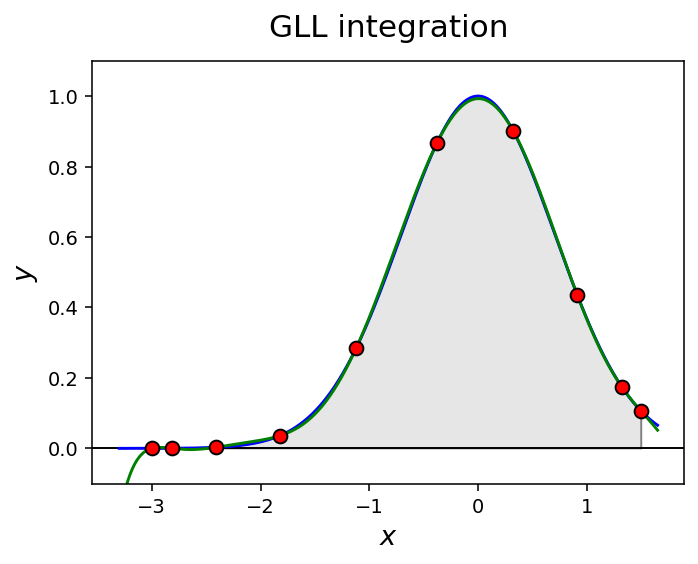

In [ ]:
if __name__ == '__main__':
  
  xi, w = gLLNodesAndWeights (n)
  
  for i in range (n):
    
    print ('xi{}: {:+.5f}  w{}: {:+.5f}'.format (i, xi[i], i, w[i]))

  print ('\nIntegral: {:.15f}'.format (integrate (xi, w, a, b)))
  
  x = np.linspace (1.1 * a, 1.1 * b, N)
  y = f (x)

  fig, ax = plt.subplots (figsize = (6, 4), dpi = 140)
  
  xm = map (xi, a, b)

  lg = lagrange (xm, f (xm))
  
  plt.axhline (0, color = 'black',
               linewidth = 1, zorder = 0)
  plt.plot (x, y, color = 'blue',
            linewidth = 1.5, zorder = 1)
  plt.plot (x, lg (x), color = 'green',
            linewidth = 1.5, zorder = 2)
  plt.scatter (xm, f (xm), marker = 'o', s = 50,
               facecolor = 'red', edgecolor = 'black',
               linewidth = 1, zorder = 3)

  plt.ylim (-0.1, 1.1)

  plt.xlabel (r'$x$', fontsize = 14)
  plt.ylabel (r'$y$', fontsize = 14)
  plt.tick_params (axis = 'x', labelsize = 10)
  plt.tick_params (axis = 'y', labelsize = 10)
  plt.title ('GLL integration', fontsize = 16, y = 1.03)

  xs = np.linspace (a, b)
  ys = f (xs)
  
  polygon  = Polygon (((a, 0), *zip (xs, ys), (b, 0)),
                      facecolor = '0.9', edgecolor = '0.5',
                      zorder = 0)
  ax.add_patch (polygon)

  plt.subplots_adjust (right = 0.83)

  plt.show ()

The same idea can be generalized to any number of dimensions for integrating functions in $\mathbb{R}^{n}$.
<br>
<br>

####References

“Jacobian matrix and determinant.” *Wikipedia*, Wikimedia Foundation, 20 Jul. 2020, https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant [Accessed 5 August 2020].
<br>
<br>
“Legendre polynomials.” *Wikipedia*, Wikimedia Foundation, 3 Jun. 2020, https://en.wikipedia.org/wiki/Legendre_polynomials [Accessed 5 August 2020].
<br>
<br>
“Nodes and Weights of Gauss-Lobatto Calculator.” *Keisan Online Calculator*, Casio Computer Co. Ltd., 2015., https://keisan.casio.com/exec/system/1280801905 [Accessed 19 October 2015].